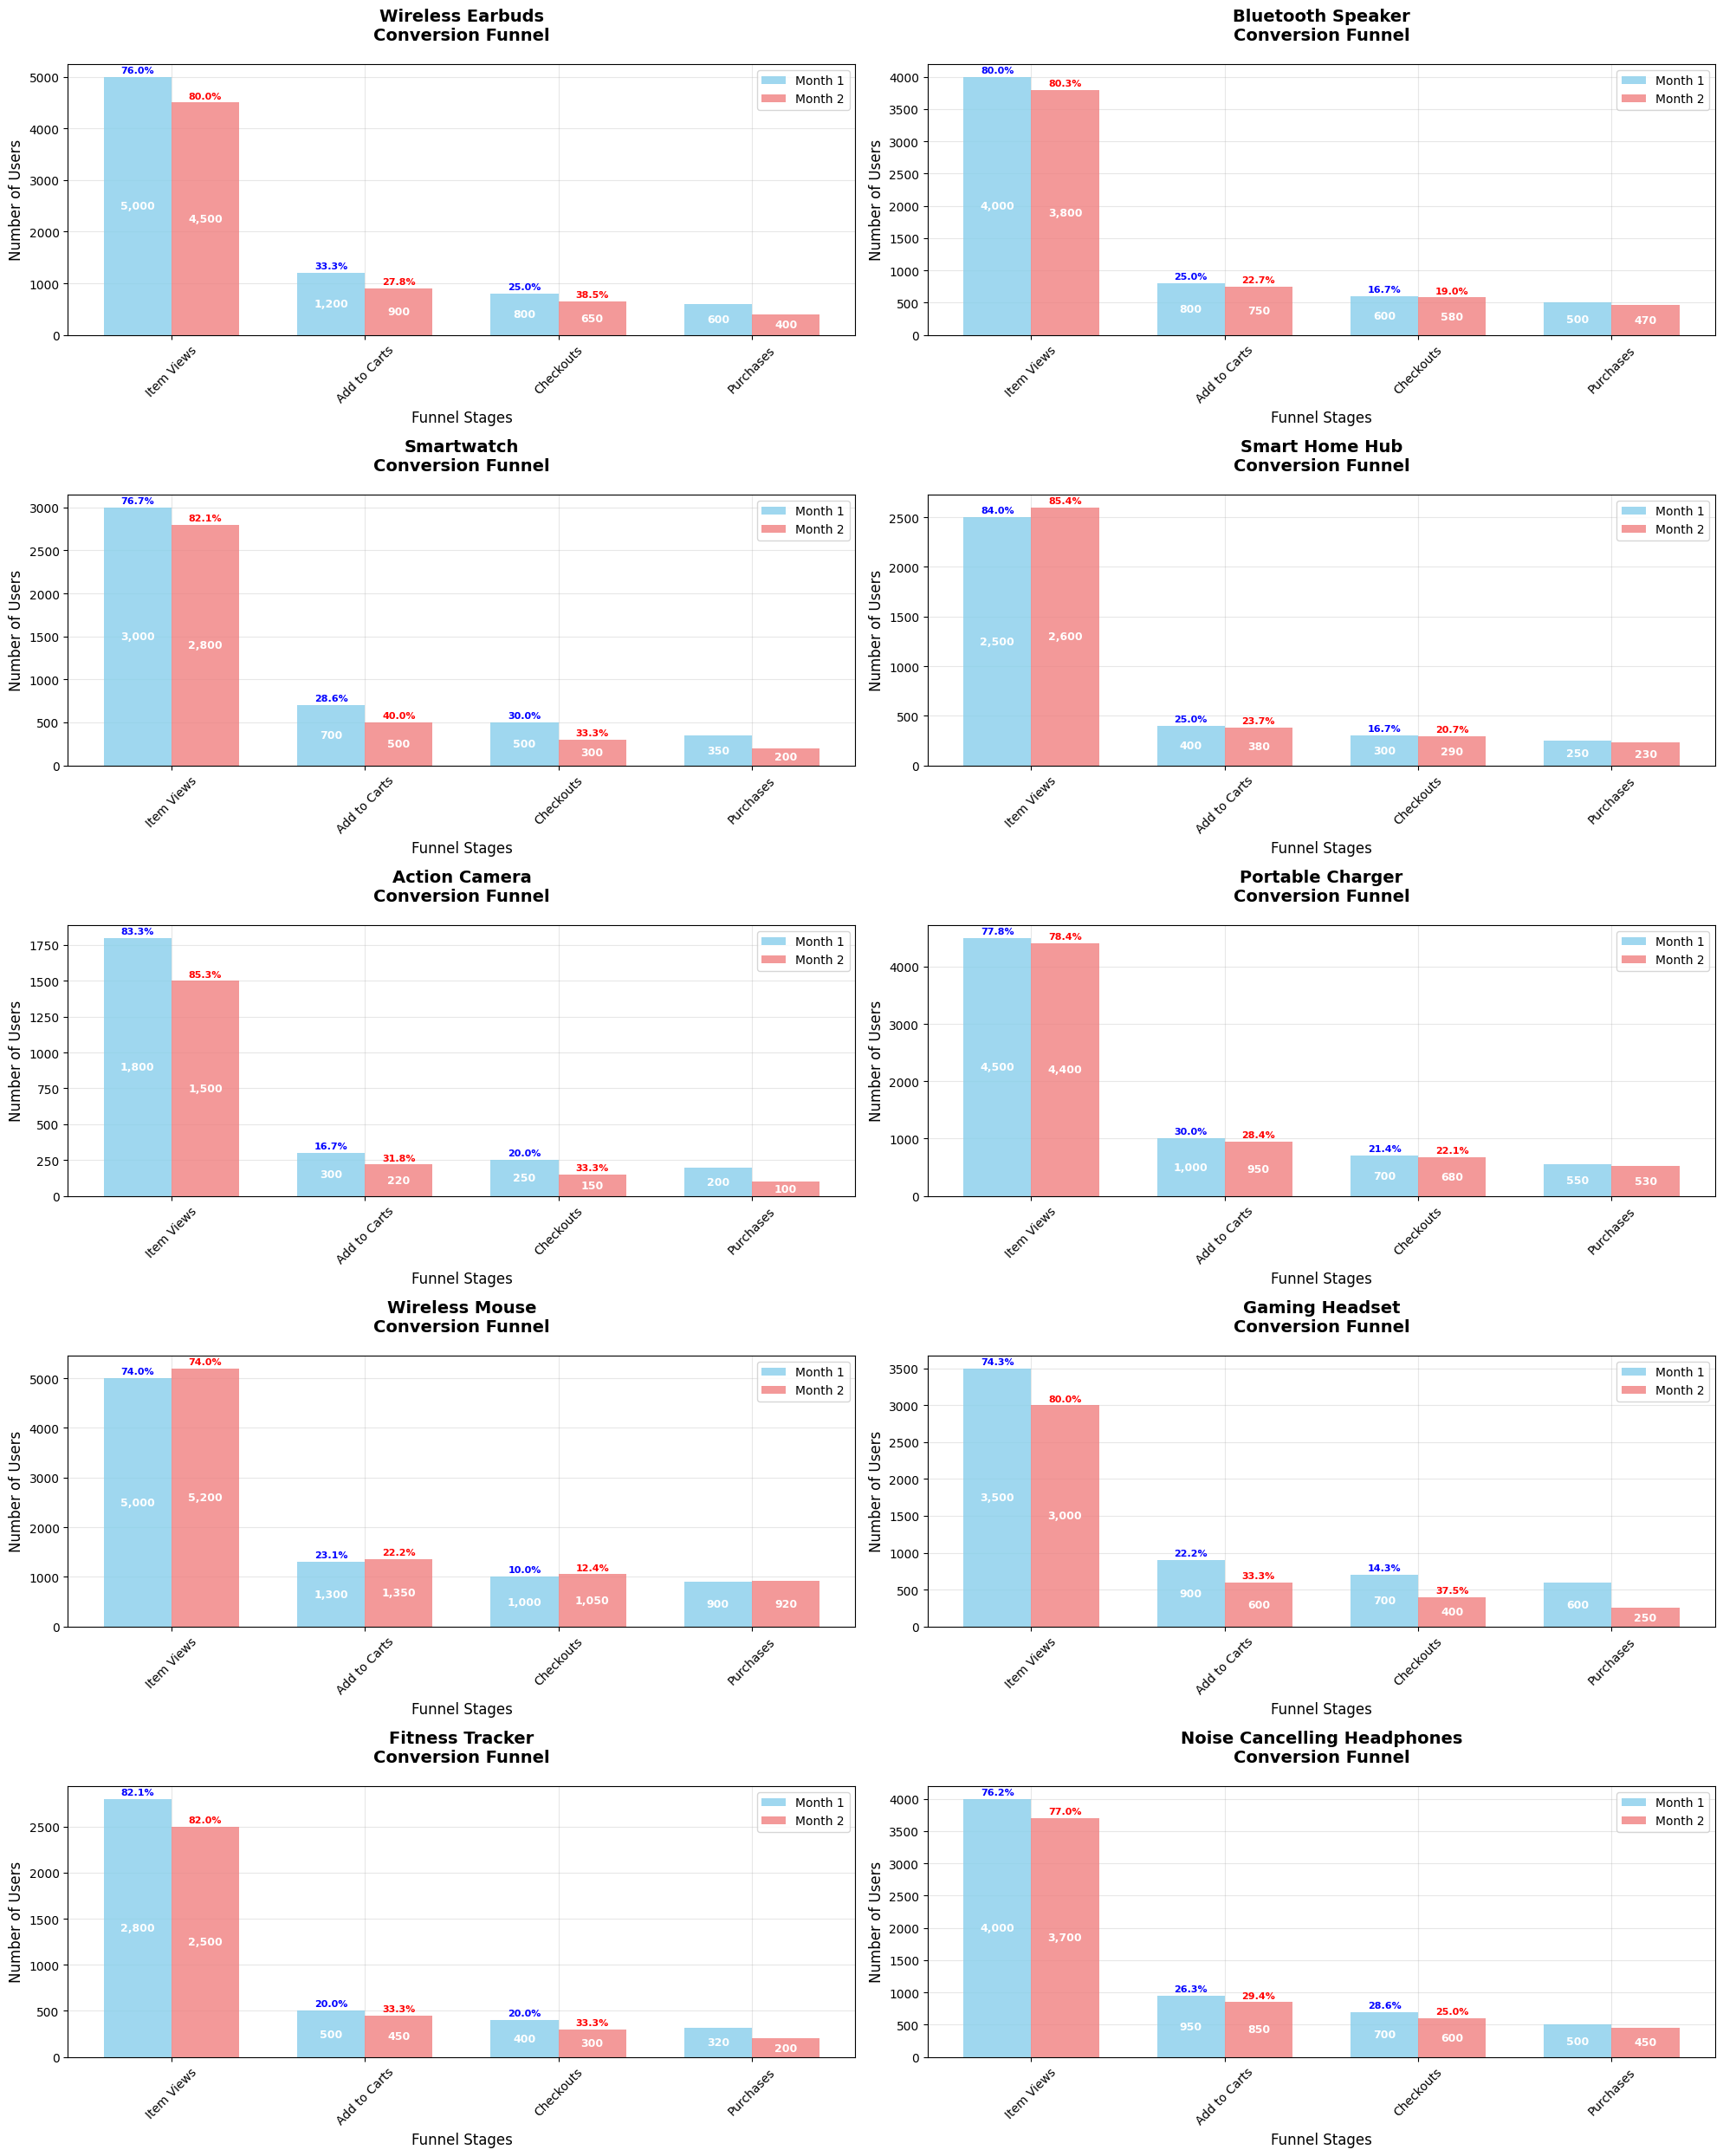

                    Product  Month View→Cart Drop-off Cart→Checkout Drop-off Checkout→Purchase Drop-off
           Wireless Earbuds      1              76.0%                  33.3%                      25.0%
           Wireless Earbuds      2              80.0%                  27.8%                      38.5%
          Bluetooth Speaker      1              80.0%                  25.0%                      16.7%
          Bluetooth Speaker      2              80.3%                  22.7%                      19.0%
                 Smartwatch      1              76.7%                  28.6%                      30.0%
                 Smartwatch      2              82.1%                  40.0%                      33.3%
             Smart Home Hub      1              84.0%                  25.0%                      16.7%
             Smart Home Hub      2              85.4%                  23.7%                      20.7%
              Action Camera      1              83.3%           

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = {
    'Product Name': ['Wireless Earbuds', 'Wireless Earbuds', 'Bluetooth Speaker', 'Bluetooth Speaker', 
                    'Smartwatch', 'Smartwatch', 'Smart Home Hub', 'Smart Home Hub',
                    'Action Camera', 'Action Camera', 'Portable Charger', 'Portable Charger',
                    'Wireless Mouse', 'Wireless Mouse', 'Gaming Headset', 'Gaming Headset',
                    'Fitness Tracker', 'Fitness Tracker', 'Noise Cancelling Headphones', 'Noise Cancelling Headphones'],
    'Month': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'Item Views': [5000, 4500, 4000, 3800, 3000, 2800, 2500, 2600, 1800, 1500, 4500, 4400, 5000, 5200, 3500, 3000, 2800, 2500, 4000, 3700],
    'Add to Carts': [1200, 900, 800, 750, 700, 500, 400, 380, 300, 220, 1000, 950, 1300, 1350, 900, 600, 500, 450, 950, 850],
    'Checkouts': [800, 650, 600, 580, 500, 300, 300, 290, 250, 150, 700, 680, 1000, 1050, 700, 400, 400, 300, 700, 600],
    'Purchases': [600, 400, 500, 470, 350, 200, 250, 230, 200, 100, 550, 530, 900, 920, 600, 250, 320, 200, 500, 450]
}

df = pd.DataFrame(data)

products = df['Product Name'].unique()

plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

for i, product in enumerate(products):
    product_data = df[df['Product Name'] == product]
    
    month1 = product_data[product_data['Month'] == 1].iloc[0]
    month2 = product_data[product_data['Month'] == 2].iloc[0]
    
    stages = ['Item Views', 'Add to Carts', 'Checkouts', 'Purchases']
    
    values1 = [month1['Item Views'], month1['Add to Carts'], month1['Checkouts'], month1['Purchases']]
    values2 = [month2['Item Views'], month2['Add to Carts'], month2['Checkouts'], month2['Purchases']]
    
    percentages1 = [f'{v:,.0f}' for v in values1]
    percentages2 = [f'{v:,.0f}' for v in values2]

    drop_off1 = [
        f"{(1 - values1[1]/values1[0])*100:.1f}%" if values1[0] > 0 else "0%",
        f"{(1 - values1[2]/values1[1])*100:.1f}%" if values1[1] > 0 else "0%", 
        f"{(1 - values1[3]/values1[2])*100:.1f}%" if values1[2] > 0 else "0%"
    ]
    
    drop_off2 = [
        f"{(1 - values2[1]/values2[0])*100:.1f}%" if values2[0] > 0 else "0%",
        f"{(1 - values2[2]/values2[1])*100:.1f}%" if values2[1] > 0 else "0%",
        f"{(1 - values2[3]/values2[2])*100:.1f}%" if values2[2] > 0 else "0%"
    ]

    x = np.arange(len(stages))
    width = 0.35
    
    bars1 = axes[i].bar(x - width/2, values1, width, label='Month 1', alpha=0.8, color='skyblue')
    bars2 = axes[i].bar(x + width/2, values2, width, label='Month 2', alpha=0.8, color='lightcoral')

    for j, (v1, v2, do1, do2) in enumerate(zip(values1, values2, drop_off1 + [''], drop_off2 + [''])):
        if j < len(values1) - 1:
            axes[i].text(j - width/2, v1 + max(values1)*0.01, do1, 
                        ha='center', va='bottom', fontsize=8, fontweight='bold', color='blue')
        axes[i].text(j - width/2, v1/2, percentages1[j], 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        
        if j < len(values2) - 1:
            axes[i].text(j + width/2, v2 + max(values2)*0.01, do2, 
                        ha='center', va='bottom', fontsize=8, fontweight='bold', color='red')
        axes[i].text(j + width/2, v2/2, percentages2[j], 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')

    axes[i].set_title(f'{product}\nConversion Funnel', fontsize=14, fontweight='bold', pad=20)
    axes[i].set_xlabel('Funnel Stages', fontsize=12)
    axes[i].set_ylabel('Number of Users', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(stages, rotation=45)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_axisbelow(True)

plt.tight_layout()
plt.show()

summary_data = []

for product in products:
    product_data = df[df['Product Name'] == product]
    
    for _, row in product_data.iterrows():
        view_to_cart = (1 - row['Add to Carts']/row['Item Views']) * 100
        cart_to_checkout = (1 - row['Checkouts']/row['Add to Carts']) * 100
        checkout_to_purchase = (1 - row['Purchases']/row['Checkouts']) * 100
        
        summary_data.append({
            'Product': product,
            'Month': row['Month'],
            'View→Cart Drop-off': f'{view_to_cart:.1f}%',
            'Cart→Checkout Drop-off': f'{cart_to_checkout:.1f}%',
            'Checkout→Purchase Drop-off': f'{checkout_to_purchase:.1f}%'
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

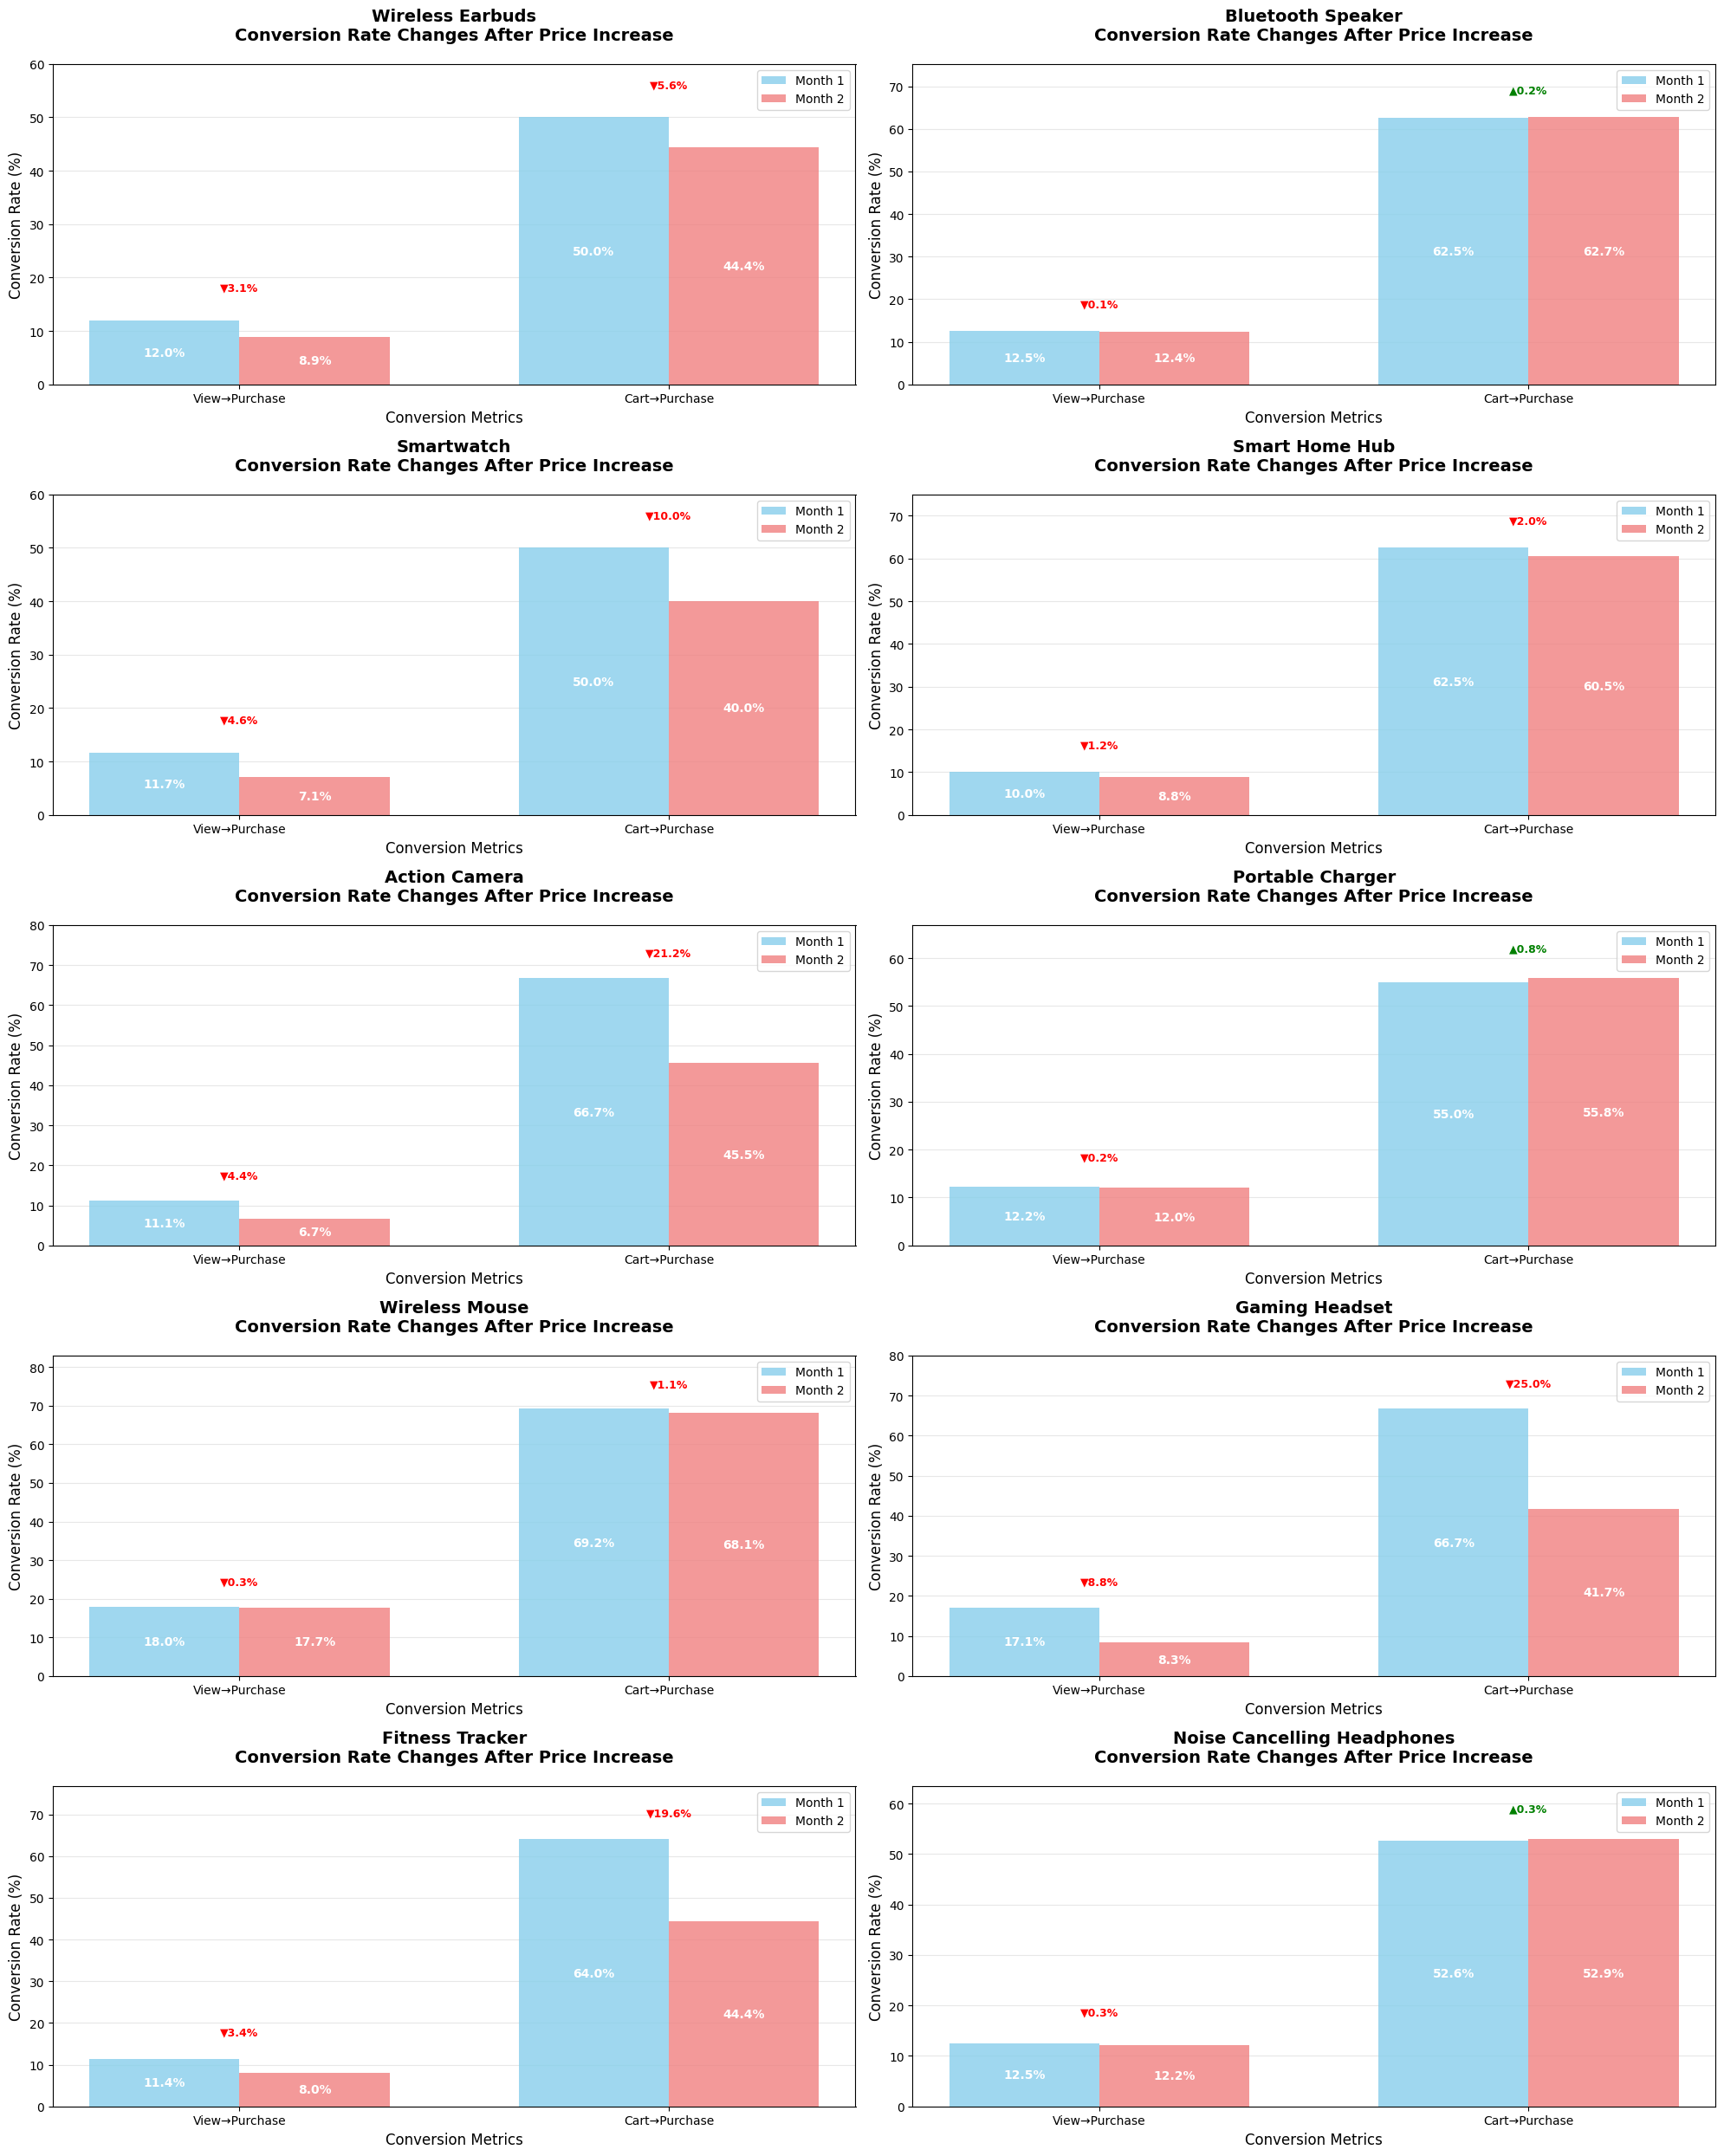

                    Product View→Purchase Change (pp) Cart→Purchase Change (pp)   Status
           Wireless Earbuds                      -3.1                      -5.6 CRITICAL
          Bluetooth Speaker                      -0.1                      +0.2   STABLE
                 Smartwatch                      -4.6                     -10.0 CRITICAL
             Smart Home Hub                      -1.2                      -2.0   STABLE
              Action Camera                      -4.4                     -21.2 CRITICAL
           Portable Charger                      -0.2                      +0.8   STABLE
             Wireless Mouse                      -0.3                      -1.1   STABLE
             Gaming Headset                      -8.8                     -25.0 CRITICAL
            Fitness Tracker                      -3.4                     -19.6 CRITICAL
Noise Cancelling Headphones                      -0.3                      +0.3   STABLE


In [5]:
data = {
    'Product Name': ['Wireless Earbuds', 'Wireless Earbuds', 'Bluetooth Speaker', 'Bluetooth Speaker', 
                    'Smartwatch', 'Smartwatch', 'Smart Home Hub', 'Smart Home Hub',
                    'Action Camera', 'Action Camera', 'Portable Charger', 'Portable Charger',
                    'Wireless Mouse', 'Wireless Mouse', 'Gaming Headset', 'Gaming Headset',
                    'Fitness Tracker', 'Fitness Tracker', 'Noise Cancelling Headphones', 'Noise Cancelling Headphones'],
    'Month': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'View-to-Purchase Rate (%)': [12.0, 8.9, 12.5, 12.4, 11.7, 7.1, 10.0, 8.8, 11.1, 6.7, 12.2, 12.0, 18.0, 17.7, 17.1, 8.3, 11.4, 8.0, 12.5, 12.2],
    'Cart-to-Purchase Rate (%)': [50.0, 44.4, 62.5, 62.7, 50.0, 40.0, 62.5, 60.5, 66.7, 45.5, 55.0, 55.8, 69.2, 68.1, 66.7, 41.7, 64.0, 44.4, 52.6, 52.9]
}

df = pd.DataFrame(data)

products = df['Product Name'].unique()

plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

for i, product in enumerate(products):
    product_data = df[df['Product Name'] == product]

    month1 = product_data[product_data['Month'] == 1].iloc[0]
    month2 = product_data[product_data['Month'] == 2].iloc[0]

    metrics = ['View-to-Purchase Rate', 'Cart-to-Purchase Rate']

    values1 = [month1['View-to-Purchase Rate (%)'], month1['Cart-to-Purchase Rate (%)']]
    values2 = [month2['View-to-Purchase Rate (%)'], month2['Cart-to-Purchase Rate (%)']]

    changes = [values2[0] - values1[0], values2[1] - values1[1]]
    
    x = np.arange(len(metrics))
    width = 0.35

    bars1 = axes[i].bar(x - width/2, values1, width, label='Month 1', alpha=0.8, color='skyblue')
    bars2 = axes[i].bar(x + width/2, values2, width, label='Month 2', alpha=0.8, color='lightcoral')

    for j, (v1, v2, change) in enumerate(zip(values1, values2, changes)):
        axes[i].text(j - width/2, v1/2, f'{v1:.1f}%', 
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        axes[i].text(j + width/2, v2/2, f'{v2:.1f}%', 
                    ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        
        change_color = 'red' if change < 0 else 'green'
        change_symbol = '▼' if change < 0 else '▲'
        axes[i].text(j, max(v1, v2) + 5, f'{change_symbol}{abs(change):.1f}%', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold', color=change_color)

    axes[i].set_title(f'{product}\nConversion Rate Changes After Price Increase', 
                     fontsize=14, fontweight='bold', pad=20)
    axes[i].set_xlabel('Conversion Metrics', fontsize=12)
    axes[i].set_ylabel('Conversion Rate (%)', fontsize=12)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['View→Purchase', 'Cart→Purchase'], rotation=0)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3, axis='y')
    axes[i].set_ylim(0, max(max(values1), max(values2)) * 1.2)
    axes[i].set_axisbelow(True)

plt.tight_layout()
plt.show()

summary_data = []

for product in products:
    product_data = df[df['Product Name'] == product]
    month1 = product_data[product_data['Month'] == 1].iloc[0]
    month2 = product_data[product_data['Month'] == 2].iloc[0]
    
    view_to_purchase_change = month2['View-to-Purchase Rate (%)'] - month1['View-to-Purchase Rate (%)']
    cart_to_purchase_change = month2['Cart-to-Purchase Rate (%)'] - month1['Cart-to-Purchase Rate (%)']
    
    summary_data.append({
        'Product': product,
        'View→Purchase Change (pp)': f'{view_to_purchase_change:+.1f}',
        'Cart→Purchase Change (pp)': f'{cart_to_purchase_change:+.1f}',
        'Status': 'CRITICAL' if view_to_purchase_change < -3 or cart_to_purchase_change < -15 else 'STABLE'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))